In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from numpy.random import default_rng
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
df_amplitude=pd.read_csv('/content/gdrive/My Drive/Thesis/lab_down_150/amp_lab150_dl.csv',header=None)


In [ ]:
df_phase=pd.read_csv('/content/gdrive/My Drive/Thesis/lab_down_150/phase_lab150_dl.csv',header=None)


In [ ]:
df_amplitude.index+=1
df_amplitude.columns+=1
df_phase.index+=1
df_phase.columns+=1

In [ ]:
df_amplitude.shape

(18000, 7500)

In [ ]:
arr=np.array(df_amplitude.T)
arrphase=np.array(df_phase.T)

In [ ]:
narr_phase=arrphase.reshape(7500,3,30,200)
narr_amp=arr.reshape(7500,3,30,200)

In [ ]:
arr_merged = np.append(narr_amp,narr_phase, axis=2)
ready_for_cnn=np.array(arr_merged)
ready_for_cnn=ready_for_cnn.transpose(0,3,2,1)

In [ ]:
ready_for_cnn.shape

(7500, 200, 60, 3)

In [ ]:
# c=np.arange(1,277)
# h=np.array([c]*20)
# v=h.flatten()

In [ ]:
labels=pd.read_csv('/content/gdrive/My Drive/Thesis/corresponding_label_for_lab150dl.csv',header=None)

In [ ]:
labels_array = labels.to_numpy()

In [ ]:
labels_array_flattened = labels_array.ravel()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(ready_for_cnn,labels_array_flattened,test_size=.2,random_state =30,stratify=labels_array_flattened)

In [ ]:
import numpy as np

# Assuming you have X_train, Y_train, X_test, Y_test already defined

# Create dictionaries to store the data
trainset = {
    'data': X_train,
    'target': Y_train
}

testset = {
    'data': X_test,
    'target': Y_test
}

# Save the trainset to an NPZ file
np.savez_compressed('/content/gdrive/My Drive/Thesis/lab_down_150/trainset.npz', **trainset)

# Save the testset to a separate NPZ file
np.savez_compressed('/content/gdrive/My Drive/Thesis/lab_down_150/testset.npz', **testset)

In [ ]:
trainset_loaded = np.load('/content/gdrive/My Drive/Thesis/lab_downlink/trainset.npz')
testset_loaded = np.load('/content/gdrive/My Drive/Thesis/lab_downlink/testset.npz')

# Extract data and targets
X_train = trainset_loaded['data']
Y_train = trainset_loaded['target']
X_test = testset_loaded['data']
Y_test = testset_loaded['target']

CNN part


In [ ]:
# c=np.arange(1,277)
# h=np.array([c]*10)
# v=h.flatten()
# from sklearn.model_selection import train_test_split
# X_train,X_test,Y_train,Y_test= train_test_split(ready_for_cnn,v,test_size=.2,random_state =30,stratify=v)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(handle_unknown='ignore',sparse_output= False)

y_train= encoder.fit_transform(Y_train.reshape([-1,1]))
y_test=encoder.transform(Y_test.reshape([-1,1]))

In [ ]:
cnn = models.Sequential([
    #1st Layer
    layers.Conv2D(filters=3, kernel_size=(3, 3),padding="same",strides=(1,1), input_shape=(200, 60, 3)),
    layers.BatchNormalization(momentum=0.9,epsilon=0.0000001),
    layers.Activation('relu'),
    layers.AveragePooling2D(pool_size=(3,3),strides=(3,3),padding="same"),
    layers.Dropout(rate=.7),

    layers.Flatten(),
    #layers.Dense(276, activation='relu'),
    layers.Dense(276, activation='softmax')
])
cnn.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
history_in=cnn.fit(X_train, y_train, epochs=30,batch_size=128,validation_data=(X_test,y_test))

Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 30s 804ms/step - accuracy: 0.0048 - loss: 6.6861 - val_accuracy: 0.0353 - val_loss: 5.1412
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 41s 800ms/step - accuracy: 0.0441 - loss: 5.2545 - val_accuracy: 0.0924 - val_loss: 4.5989
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 40s 774ms/step - accuracy: 0.0944 - loss: 4.5611 - val_accuracy: 0.1313 - val_loss: 4.1739
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 41s 777ms/step - accuracy: 0.1740 - loss: 3.8979 - val_accuracy: 0.1947 - val_loss: 3.7503
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 41s 788ms/step - accuracy: 0.2784 - loss: 3.2863 - val_accuracy: 0.2745 - val_loss: 3.3440
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 41s 781ms/step - accuracy: 0.3648 - loss: 2.8114 - val_accuracy: 0.2962 - val_loss: 3.1329
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 41s 788ms/step - accuracy: 0.4301 - loss: 2.4526 - val_accuracy: 0.3687 - val_loss: 2.8897
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 28s 796ms/step - accuracy: 0.5340 - loss: 2.0780 - val_accu

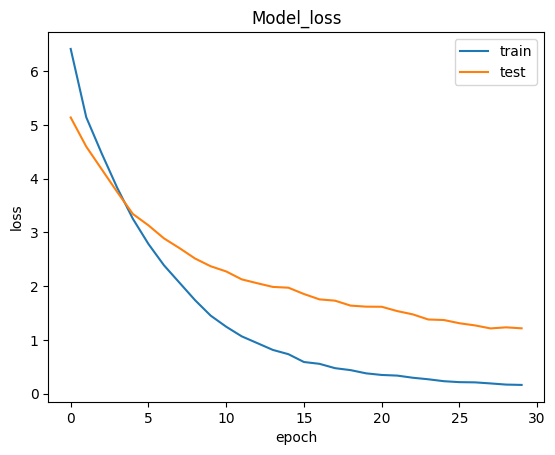

In [ ]:
import matplotlib.pyplot as plt # Import the matplotlib library and assign it the alias 'plt'

plt.plot(history_in.history['loss'])
plt.plot(history_in.history['val_loss'])
plt.title('Model_loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

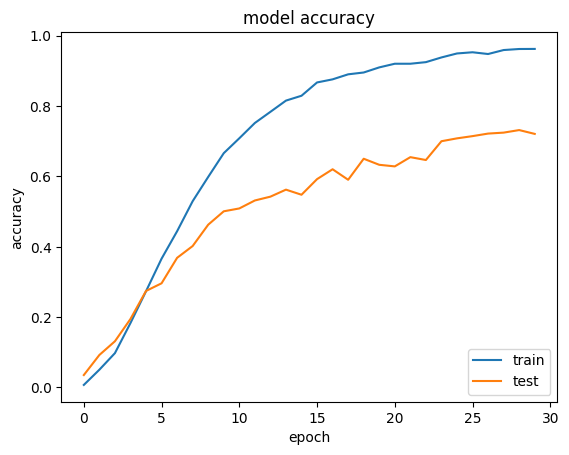

In [ ]:
plt.plot(history_in.history['accuracy'])
plt.plot(history_in.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# **Transfer Learning Part**

In [ ]:
from tensorflow import keras
model=keras.models.load_model('/content/gdrive/My Drive/Thesis/fine_tuning/homedownlink_saved.hdf5')

In [ ]:
model.trainable= True

In [ ]:
model.summary()

In [ ]:
len(model.trainable_variables)

In [ ]:
fine_tune_at=6

In [ ]:
for layer in model.layers[:fine_tune_at]:
  layer.trainable= False

In [ ]:
base_learning_rate=.001

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate/10),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
fine_tune_epochs = 400
total_epochs =  80 + fine_tune_epochs


In [ ]:
history=model.fit(X_train, y_train, epochs=total_epochs,batch_size=32,validation_data=(X_test,y_test))

In [ ]:
y_hat=cnn.predict(X_test)

y_hat2=1+y_hat.argmax(axis=1)

print((y_hat2==Y_test).sum())

In [ ]:
h=cnn.evaluate(X_test,y_test)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# plt.plot(train_loss)
# plt.plot(test_loss)
# plt.title('Model_loss')
# plt.ylabel('loss')

# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper right')
# plt.show()

In [ ]:
# plt.plot(train_acc)
# plt.plot(test_acc)
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='lower right')
# plt.show()

In [ ]:
history.history.keys()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [ ]:
trainset = {
    'data': X_train,
    'target': Y_train
}

testset = {
    'data': X_test,
    'target': Y_test
}

In [ ]:
import numpy as np

# Assuming you've mounted your Google Drive using:
# from google.colab import drive
# drive.mount('/content/drive')

# Define the save path
save_path = '/content/drive/My Drive/Thesis/'  # Replace with your desired folder

# Save the objects using NumPy's savez_compressed function
np.savez_compressed(save_path + 'trainset.npz', data=trainset['data'], target=trainset['target'])
np.savez_compressed(save_path + 'testset.npz', data=testset['data'], target=testset['target'])

# -------------------------------------------------------------------
# To load the objects later:

# Load the objects using NumPy's load function
trainset_loaded = np.load(save_path + 'trainset.npz')
testset_loaded = np.load(save_path + 'testset.npz')

# Recreate the dictionaries
trainset = {
    'data': trainset_loaded['data'],
    'target': trainset_loaded['target']
}

testset = {
    'data': testset_loaded['data'],
    'target': testset_loaded['target']
}

print("Trainset and Testset loaded successfully!")

Trainset and Testset loaded successfully!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

class CustomDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        target = self.targets[idx]
        return sample, target


def getData(trainset_path, testset_path, train_bs, test_bs):
    """Loads train and test data from .npz files and creates DataLoaders.

    Args:
        trainset_path (str): Path to the trainset .npz file.
        testset_path (str): Path to the testset .npz file.
        train_bs (int): Batch size for the train DataLoader.
        test_bs (int): Batch size for the test DataLoader.

    Returns:
        tuple: A tuple containing the train DataLoader and test DataLoader.
    """

    # Load data from .npz files
    trainset_loaded = np.load(trainset_path)
    testset_loaded = np.load(testset_path)

    # Extract data and targets
    X_train = trainset_loaded['data']
    Y_train = trainset_loaded['target']
    X_test = testset_loaded['data']
    Y_test = testset_loaded['target']

    # Create CustomDataset instances (without transforms)
    trainset = CustomDataset(X_train, Y_train)
    testset = CustomDataset(X_test, Y_test)

    # Create DataLoaders
    train_loader = DataLoader(trainset, batch_size=train_bs, shuffle=True)
    test_loader = DataLoader(testset, batch_size=test_bs, shuffle=False)

    return train_loader, test_loader

# Example usage:
train_loader, test_loader = getData('/content/drive/My Drive/Thesis/trainset.npz',
                                     '/content/drive/My Drive/Thesis/testset.npz',
                                     train_bs=128, test_bs=128)

In [ ]:
import torch.nn as nn

def cnn_resnet(num_classes=276, input_shape=(200, 60, 3)):
    """
    A CNN model resembling the structure of the provided ResNet function.

    Args:
        num_classes (int): Number of output classes (default: 276).
        input_shape (tuple): Shape of the input data (default: (200, 60, 3)).

    Returns:
        nn.Sequential: The CNN model.
    """

    # Calculate output size after conv and pooling
    conv_out_size = (input_shape[0], input_shape[1], 3)  # Output size after conv
    pool_out_size = (conv_out_size[0] // 3, conv_out_size[1] // 3, conv_out_size[2])  # Output size after avgpool

    return nn.Sequential(
        nn.Conv2d(input_shape[2], 3, kernel_size=(3, 3), padding="same", stride=(1, 1)),  # Input channels = input_shape[2]
        nn.BatchNorm2d(3, momentum=0.9, eps=0.000001),
        nn.ReLU(),
        nn.AvgPool2d(kernel_size=(3, 3), stride=(3, 3), padding="same"),
        nn.Dropout(p=0.7),
        nn.Flatten(),
        nn.Linear(pool_out_size[0] * pool_out_size[1] * pool_out_size[2], num_classes),
        nn.Softmax(dim=1)  # Apply softmax along the class dimension
    )

# Example usage:
model = cnn_resnet()
print(model)

Sequential(
  (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (1): BatchNorm2d(3, eps=1e-06, momentum=0.9, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): AvgPool2d(kernel_size=(3, 3), stride=(3, 3), padding=same)
  (4): Dropout(p=0.7, inplace=False)
  (5): Flatten(start_dim=1, end_dim=-1)
  (6): Linear(in_features=3960, out_features=276, bias=True)
  (7): Softmax(dim=1)
)
